Import Libraries

In [1]:
from PyQt5.QtCore import *
import pandas as pd
from qgis.core import *
import os
import geopandas as gpd
import fiona
import sys
import math
import numpy
from shapely.geometry import shape
from shapely.geometry import Polygon
from itertools import combinations
from shapely.geometry import LineString
import matplotlib 

In [13]:
x = r"G:\.shortcut-targets-by-id\0B6-MI-dco6FLWkZmTDZ4MFhRU1k\7. SaltMUAS_share\UAS Data Collection\Peggotty Beach, Scituate\Data_2018\Poly_Working\Peggoty_NoBody.shp"

In [15]:
x

'G:\\.shortcut-targets-by-id\\0B6-MI-dco6FLWkZmTDZ4MFhRU1k\\7. SaltMUAS_share\\UAS Data Collection\\Peggotty Beach, Scituate\\Data_2018\\Poly_Working\\Peggoty_NoBody.shp'

'G:\\.shortcut-targets-by-id\\0B6-MI-dco6FLWkZmTDZ4MFhRU1k\\7. SaltMUAS_share\\UAS Data Collection\\Peggotty Beach, Scituate\\Data_2018\\Poly_Working\\Peggoty_NoBody.shp'

In [14]:
gpd.GeoDataFrame.from_file(x)

,Transect,PointNum,SubClass,Northing,Easting,Altitude,Notes,Class,Raw Subcla,Pre Angle,Post Angle,mu,Class mu,Pre/Post,Area_meter,geometry
0,4,7,13a,4672421.277,357584.895,1.311,poly,1,13,None,None,None,None,None,None,"POLYGON ((357578.020 4672420.354, 357584.895 4..."
1,20,60,23jn,4672452.464,357629.781,1.224,poly,2,23,None,None,None,None,None,None,"POLYGON ((357623.239 4672451.539, 357629.781 4..."
2,28,81,01a,4672481.383,357664.745,1.058,poly,1,01,None,None,None,None,None,None,"POLYGON ((357653.128 4672481.707, 357653.416 4..."
3,54,118,22kn,4672484.217,357741.904,0.238,poly,2,22,None,None,None,None,None,None,"POLYGON ((357725.006 4672482.289, 357727.272 4..."
4,56,126,27k,4672479.306,357746.119,0.732,poly,2,28,None,None,None,None,None,None,"POLYGON ((357746.119 4672479.306, 357746.847 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,65,180,01a,4672436.117,357721.357,0.5620000000000001,line,1,01,-71.22595519675387,0.136635153489177,0,0,post,None,"POLYGON ((357725.129 4672437.126, 357726.129 4..."
154,1,2,06a,4672433.465,357584.466,1.444,1 mu,1,06,0,-91.99182732257856,1,1,pre,None,"POLYGON ((357585.466 4672434.465, 357585.466 4..."
155,14,46,05a,4672434.925,357524.2720000001,1.428,line,1,05,-58.42389134988657,6.88923258893933,1,1,pre,None,"POLYGON ((357525.648 4672434.597, 357523.944 4..."
156,33,93,03a,4672497.152,357663.848,1.14,line,1,03,87.19990388852499,95.87340334286371,1,1,pre,None,"POLYGON ((357662.898 4672498.200, 357664.896 4..."


In [ ]:
# Set the Polygon to preserve

# Paste file path after "r" for Polygons
# mainpolygdf is preserved
# secpolygdf is erased 
mp = input("Input Polygon to preserve here --- ")
sp = input("Input Polygon to erase here --- ")
mp = mp[1:-1]
sp = sp[1:-1]
mainpolygdf = gpd.GeoDataFrame.from_file(mp)
secpolygdf = gpd.GeoDataFrame.from_file(sp)

Check GeoDataFrames of Polygons

In [4]:
mainpolygdf

,Transect,PointNum,SubClass,Northing,Easting,Altitude,Notes,Class,Raw Subcla,Pre Angle,Post Angle,mu,Class mu,Pre/Post,geometry
0,N/A,N/A,21j,N/A,N/A,N/A,poly,2,21,N/A,N/A,N/A,N/A,N/A,"POLYGON ((354911.571 4723935.561, 354910.385 4..."


In [5]:
secpolygdf

,Transect,PointNum,SubClass,Northing,Easting,Altitude,Notes,Class,Raw Subcla,Pre Angle,Post Angle,mu,Class mu,Pre/Post,geometry
0,1,1,06a,4724010.106,354917.469,1.240,line,1,06,0.000000,-88.758601,0,0,post,"POLYGON ((354918.782 4723995.684, 354918.803 4..."
1,3,4,04a,4723991.731,354918.051,1.211,line,1,04,-82.306356,-92.665527,0,0,post,"POLYGON ((354918.756 4723985.369, 354918.709 4..."
2,4,6,05a,4723983.547,354917.603,1.191,line,1,05,-94.710360,-91.469698,0,0,post,"POLYGON ((354918.519 4723980.247, 354918.493 4..."
3,5,8,04a,4723978.377,354917.463,1.213,line,1,04,-91.691789,-93.763432,0,0,post,"POLYGON ((354917.315 4723960.889, 354917.249 4..."
4,6,10,05a,4723958.723,354916.235,1.125,line,1,05,-92.104006,-93.783263,0,0,post,"POLYGON ((354916.678 4723950.264, 354916.612 4..."
5,7,12,04a,4723948.767,354915.630,1.121,line,1,04,-91.832254,-88.869690,0,0,post,"MULTIPOLYGON (((354916.747 4723942.857, 354916..."
6,8,14,05a,4723941.076,354915.665,1.150,line,1,05,-92.666021,-93.797612,0,0,post,"POLYGON ((354916.387 4723936.852, 354916.321 4..."
7,9,16,02a,4723935.112,354915.318,1.064,line,1,02,-92.251333,-96.411986,0,0,post,"POLYGON ((354916.125 4723933.336, 354916.013 4..."
8,9,17,02a,4723933.448,354915.131,1.045,line,1,02,-96.411986,-5.955075,0,0,post,"MULTIPOLYGON (((354916.673 4723934.293, 354917..."
9,9,18,02a,4723933.298,354916.569,1.093,line,1,02,-5.955075,-6.391291,0,0,post,"MULTIPOLYGON (((354925.786 4723933.272, 354926..."


In [6]:
# # Use itertools to iterate through all polys within shapefile by combination

# for p1_idx, p2_idx in combinations(polygdf.geometry.index, 2):
#     if polygdf.geometry.loc[p1_idx].intersects(polygdf.geometry.loc[p2_idx]):
#         # Store intermediary results back to poly
#         polygdf.geometry.loc[p2_idx] -= polygdf.geometry.loc[p1_idx]
# # polygdf is now saved with the new geometry where it does not overlap itself

In [7]:
for p1_idx in secpolygdf.geometry.index:
    for p2_idx in mainpolygdf.geometry.index:
        if secpolygdf.geometry.loc[p1_idx].intersects(mainpolygdf.geometry.loc[p2_idx]):
            secpolygdf.geometry.loc[p1_idx] -= mainpolygdf.geometry.loc[p2_idx]

<AxesSubplot:>

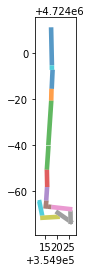

In [8]:
# Preview polygons using matplotlib
secpolygdf.plot(alpha=0.75, cmap="tab10")

Output Newly Erased Files

In [9]:
# Enter file path to variable to specify output
outFolder = input("Input Final Folder Destination here --- ")
outFolder = outFolder[1:-1]
filename = input("Enter file name here -- ")
outShape = outFolder + "//" + filename
outShape
# outShape = r"G:\.shortcut-targets-by-id\0B6-MI-dco6FLWkZmTDZ4MFhRU1k\SaltMUAS_share\UAS Data Collection\Peggotty Beach, Scituate\Data_2018\Test\Transects_Finalv2.shp"

secpolygdf.to_file(outShape)

Input Final Folder Destination here --- "G:\.shortcut-targets-by-id\0B6-MI-dco6FLWkZmTDZ4MFhRU1k\7. SaltMUAS_share\UAS Data Collection\Essex Bay\GIS_Data\2021\Transects_Fixed"
Enter file name here -- Essex_2_Jun_2021_Transects_Final_Fixed


In [10]:
secpolygdf.to_file(outShape)